#### task:

given gene expression (RNA), predict surface protein levels.

- train/test_cite_inputs.h5: Rows corresponding to cells and columns corresponding to genes given by {gene_name}_{gene_ensemble-ids}
 - have 22085 genes
 - from these: 84 are handselected and hstacked to the right
 - ... and on the remaining 22001 genes, TruncatedSVD is applied -> 128 svd components instead -> hstacked to the left
- train_cite_targets.h5: Surface protein levels for the same cells
 - 140 proteins, e.g. CD36

previous notebooks: compute shap values 
- on svd components + handselected: get shap values of shape (140, n_samples, n_svd_components+84)
- backpropagated attributions to all genes: get attr_all_22085_genes of shape (140, n_samples, 22085)

plotting.ipynb: compare plots for different proteins
now: 
- quantify results in plots
- kl divergence as new metric to order feature importance by

In [1]:
%%capture output
!pip install shap
!pip install anndata
!pip install ipywidgets
!pip install --upgrade jupyter
!pip install IProgress

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import pandas as pd
import os
print(os.getcwd())
import random

import shap

import anndata as ad
import scipy
# import scipy.special as sp
import scanpy as sc

from scipy import stats

from helper_functions import *    # includes os.chdir('../..')! also loading attr datasets -> takes a while

/dss/dsshome1/02/di93zoj/valentina/open-problems-multimodal-3rd-solution/code/4.model/pred


In [2]:
plt.rcParams['figure.dpi'] = 100
sc.set_figure_params(dpi=100, frameon=False, color_map='Reds', facecolor=None)
sc.logging.print_header()

scanpy==1.9.5 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.2 scikit-learn==1.2.2 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.8


In [3]:
random.seed(42)

In [4]:
lrz_path = '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93zoj/'
index_path = lrz_path + 'open-problems-multimodal-3rd-solution/input/preprocess/cite/'
train_column = np.load(index_path + "train_cite_raw_inputs_idxcol.npz", allow_pickle=True)["columns"]

### attr_all_22085_genes of model 16

In [6]:
# xtest_16 = ad.read_h5ad('4.model/pred/private_test_input_128_svd_50_samples.h5ad')
# private_test_input_raw = pd.read_pickle('/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93zoj/kaggle/full_data/20220830_citeseq_rna_count_test_input_private_raw.pkl')
# sample_cells = np.array(xtest_16.obs_names)
# xtest_all_genes = private_test_input_raw.loc[sample_cells]

In [7]:
# attr_all_22085_genes_16 = pd.read_pickle(lrz_path + 'large_preprocessed_files/attr_all_genes/attr_all_22085_genes_16_50_samples_p_ct_distr.pkl')
# for i in range(len(attr_all_22085_genes_16)):
#     attr_all_22085_genes_16[i] = attr_all_22085_genes_16[i].reindex(columns=train_column)

In [8]:
# top_20 = get_top_features(attr_all_22085_genes_16[0], ad.AnnData(xtest_all_genes, dtype=xtest_all_genes.dtypes), 20)
# top_20

In [9]:
# get_top_features(attr_all_22085_genes_16[2], ad.AnnData(xtest_all_genes, dtype=xtest_all_genes.dtypes), 20)

In [10]:
# get_top_features(attr_all_22085_genes_16[3], ad.AnnData(xtest_all_genes, dtype=xtest_all_genes.dtypes), 20)

In [11]:
# top attributing genes across all targets
# get_common_elements(attr_all_22085_genes_16, ad.AnnData(xtest_all_genes, dtype=xtest_all_genes.dtypes), 20, 0.75)

### model 17:

In [12]:
# xtest_17 = ad.read_h5ad('4.model/pred/private_test_input_64_svd_50_samples.h5ad')
# attr_all_22085_genes_17 = pd.read_pickle(lrz_path + 'large_preprocessed_files/attr_all_genes/attr_all_22085_genes_17_50_samples_p_ct_distr.pkl')
# for i in range(len(attr_all_22085_genes_17)):
#     attr_all_22085_genes_17[i] = attr_all_22085_genes_17[i].reindex(columns=train_column)

### quantify results from plotting.ipynb: compare gene attr distr to avg distr

spearman correlation and kurtosis variance metric did not work


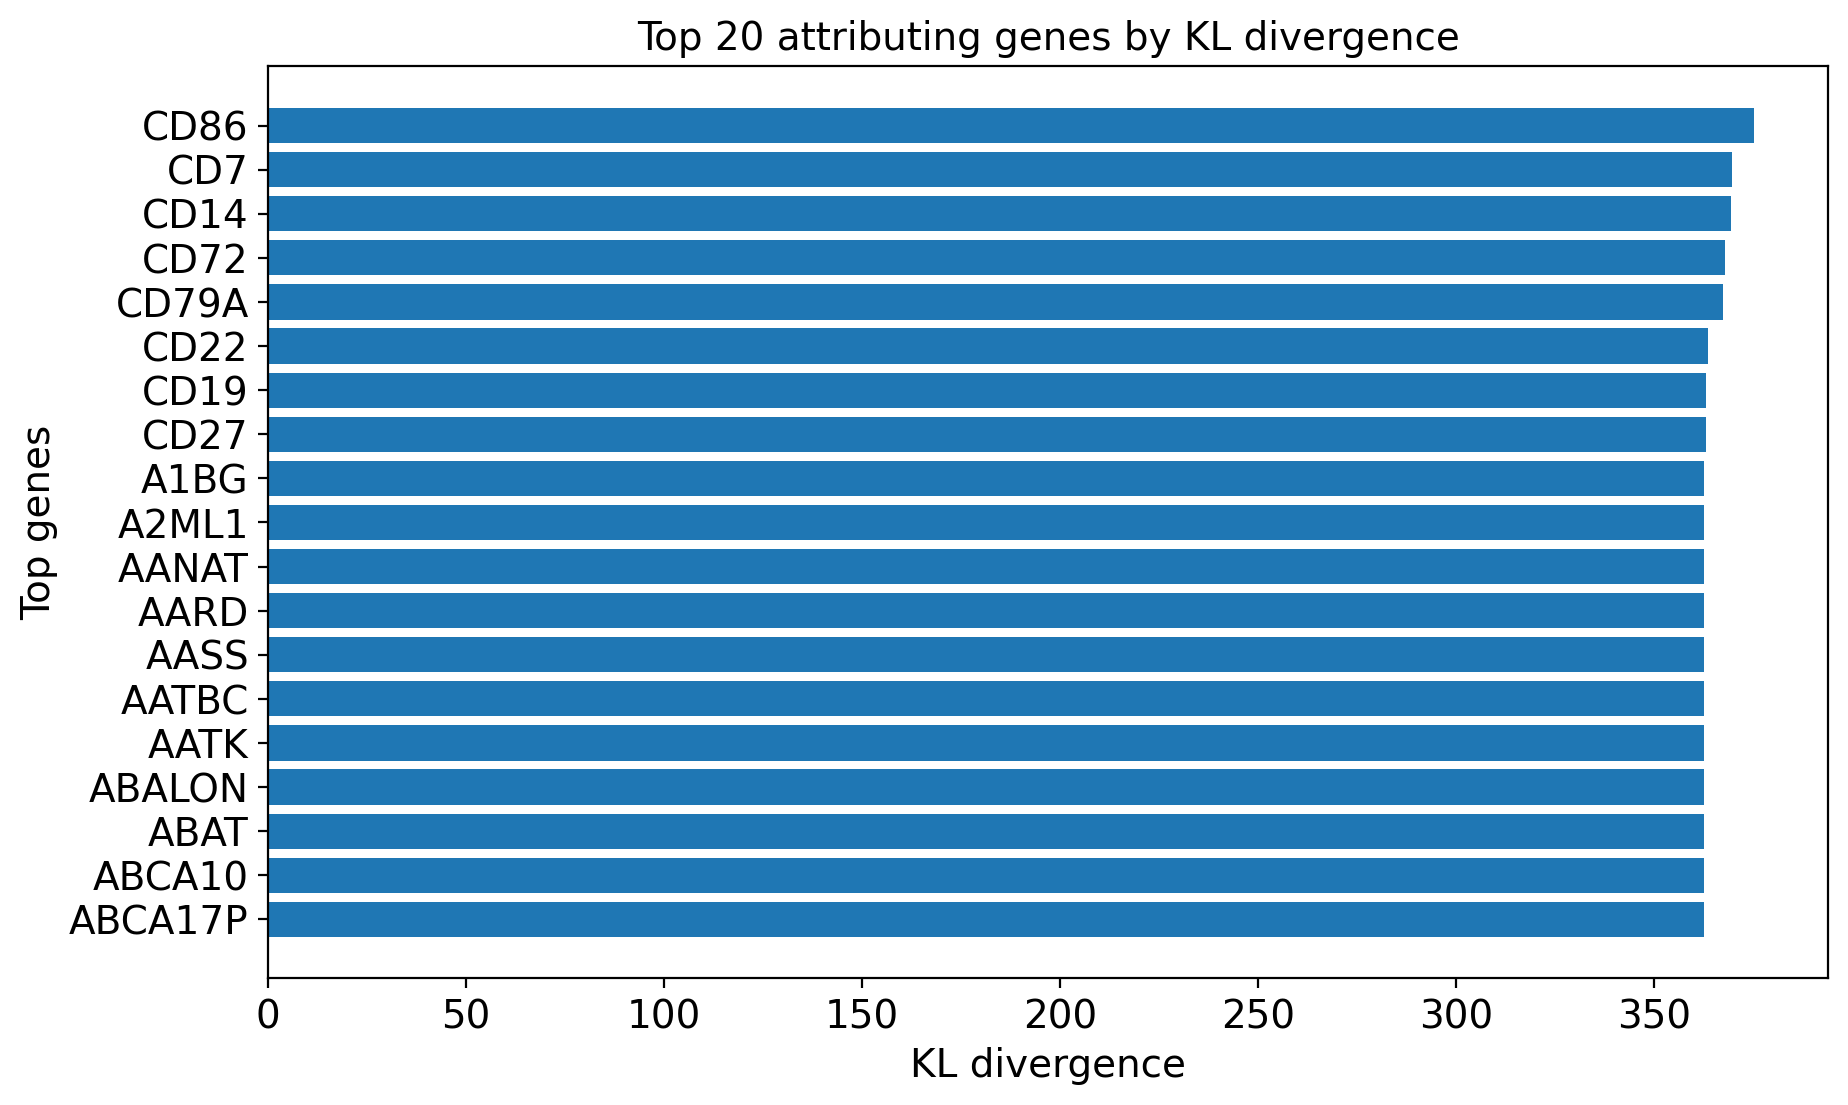

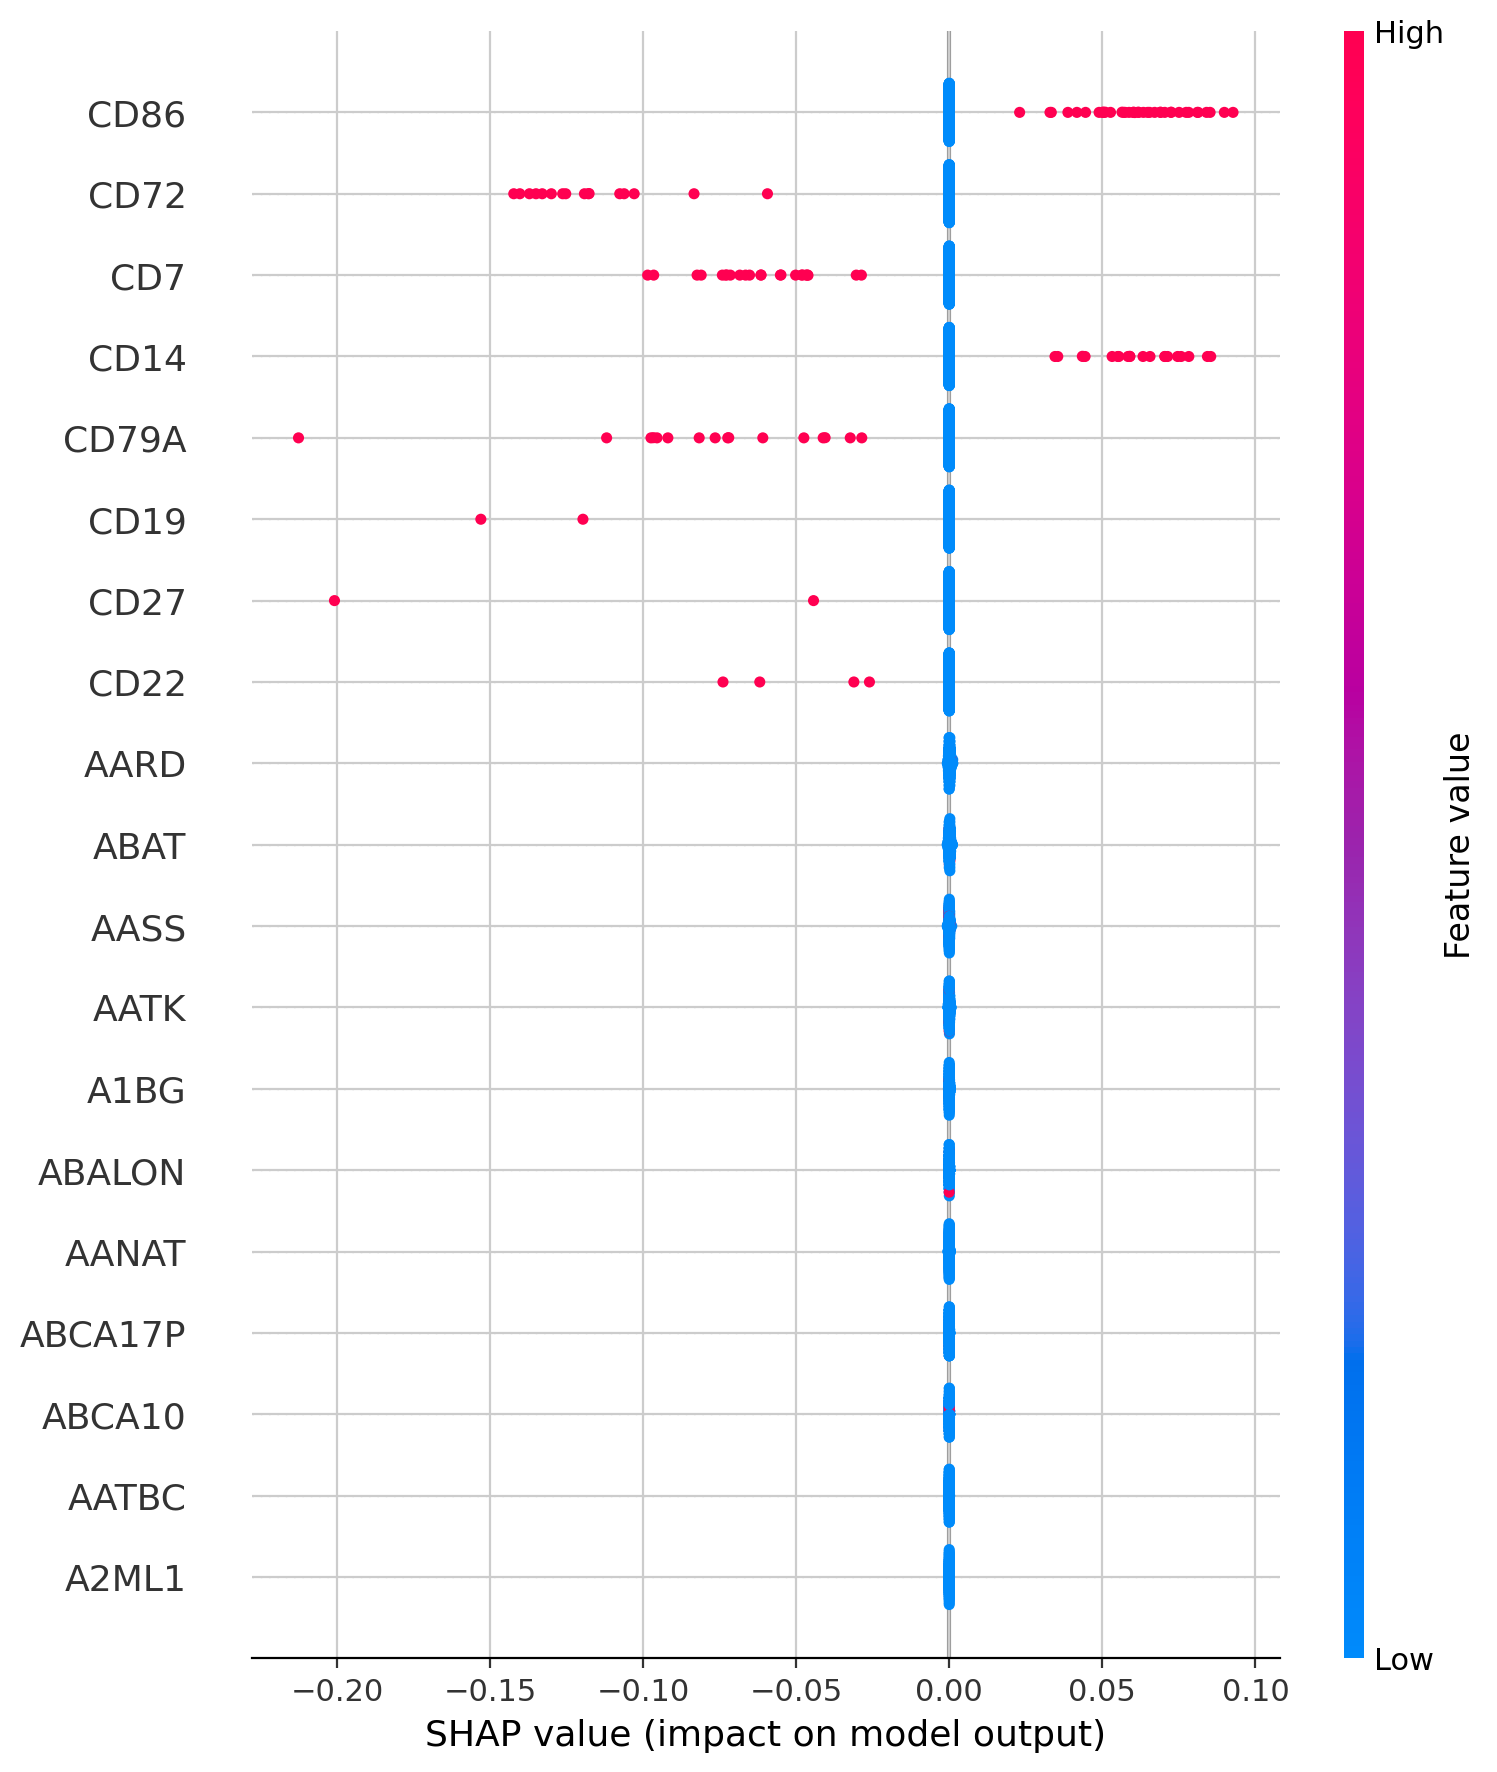

In [6]:
# ranking by kl divergence
ranked = ranking(16, 'CD86', random_sample_number=1000)


#### combine kl divergence with correlation

Improve the ranking here by filtering using correlation instead of mean

1
2


invalid value encountered in divide


3
4


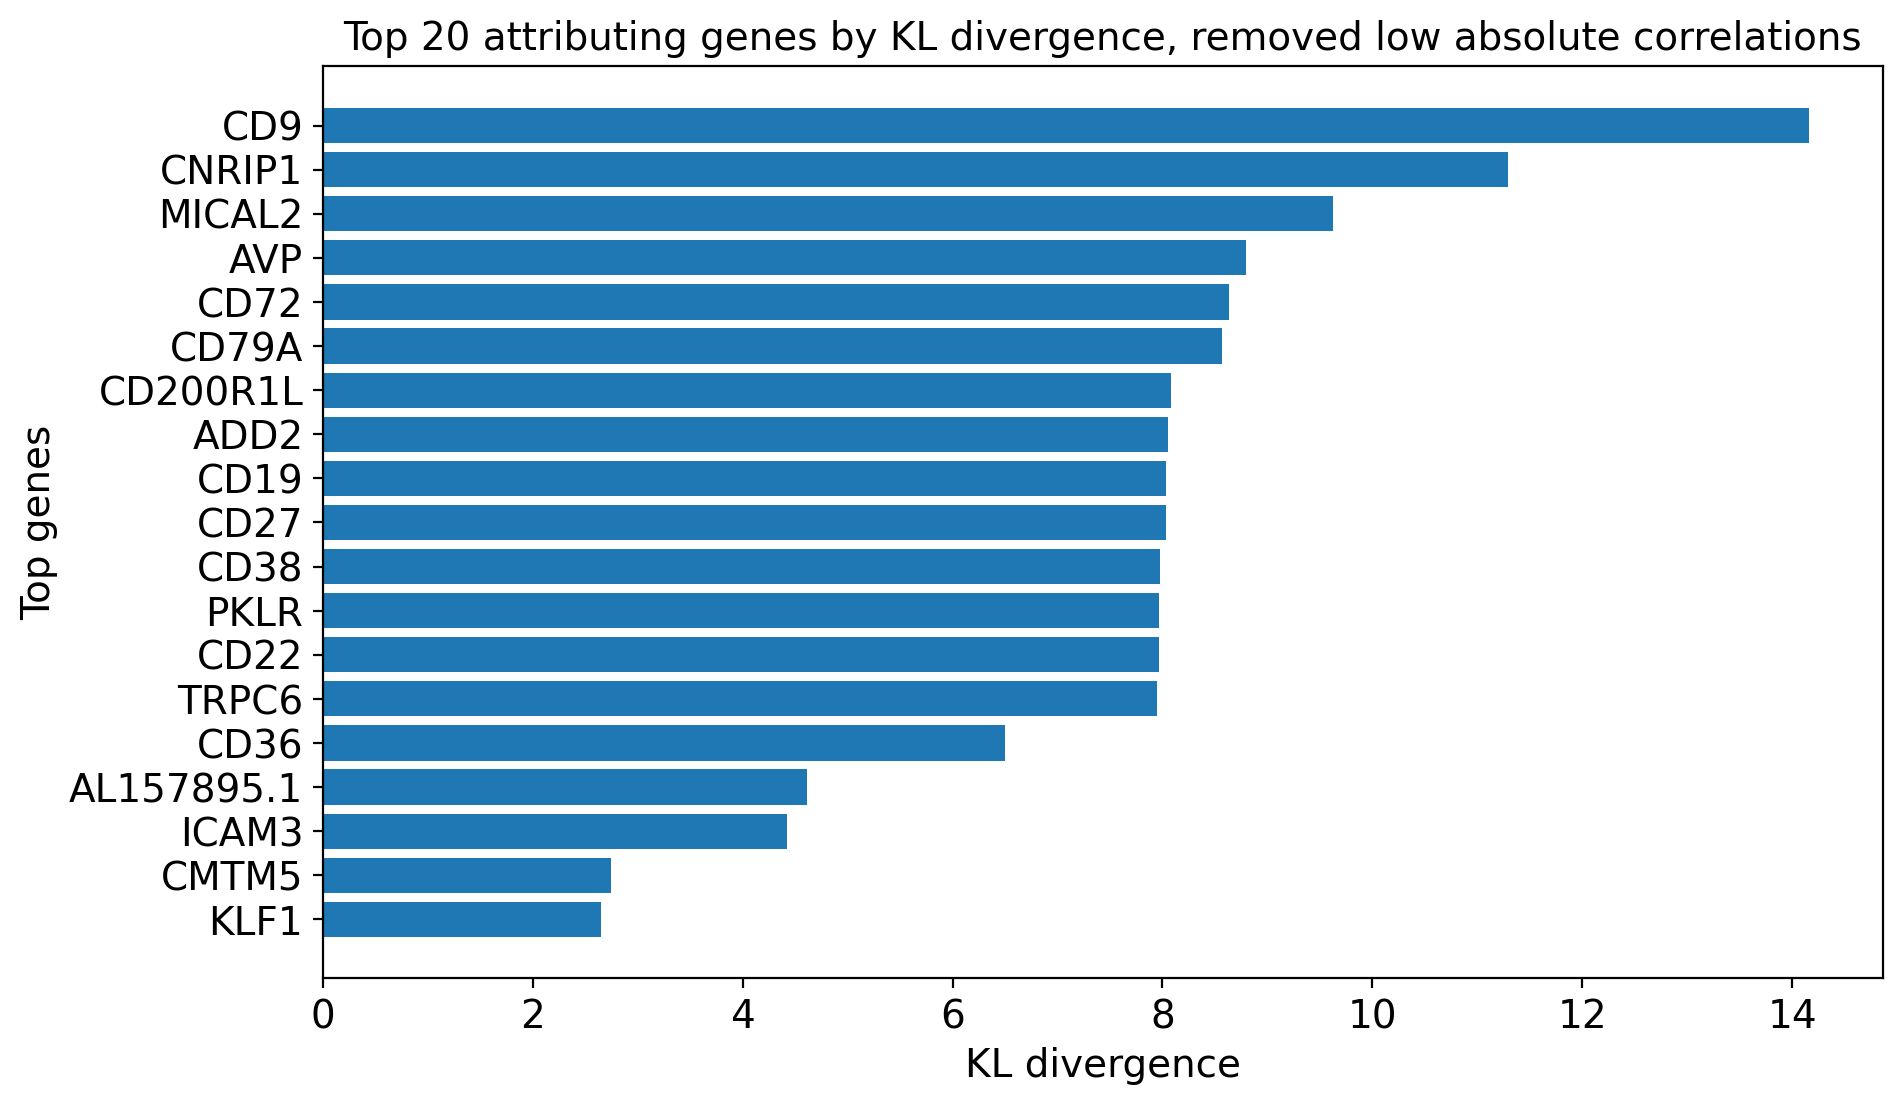

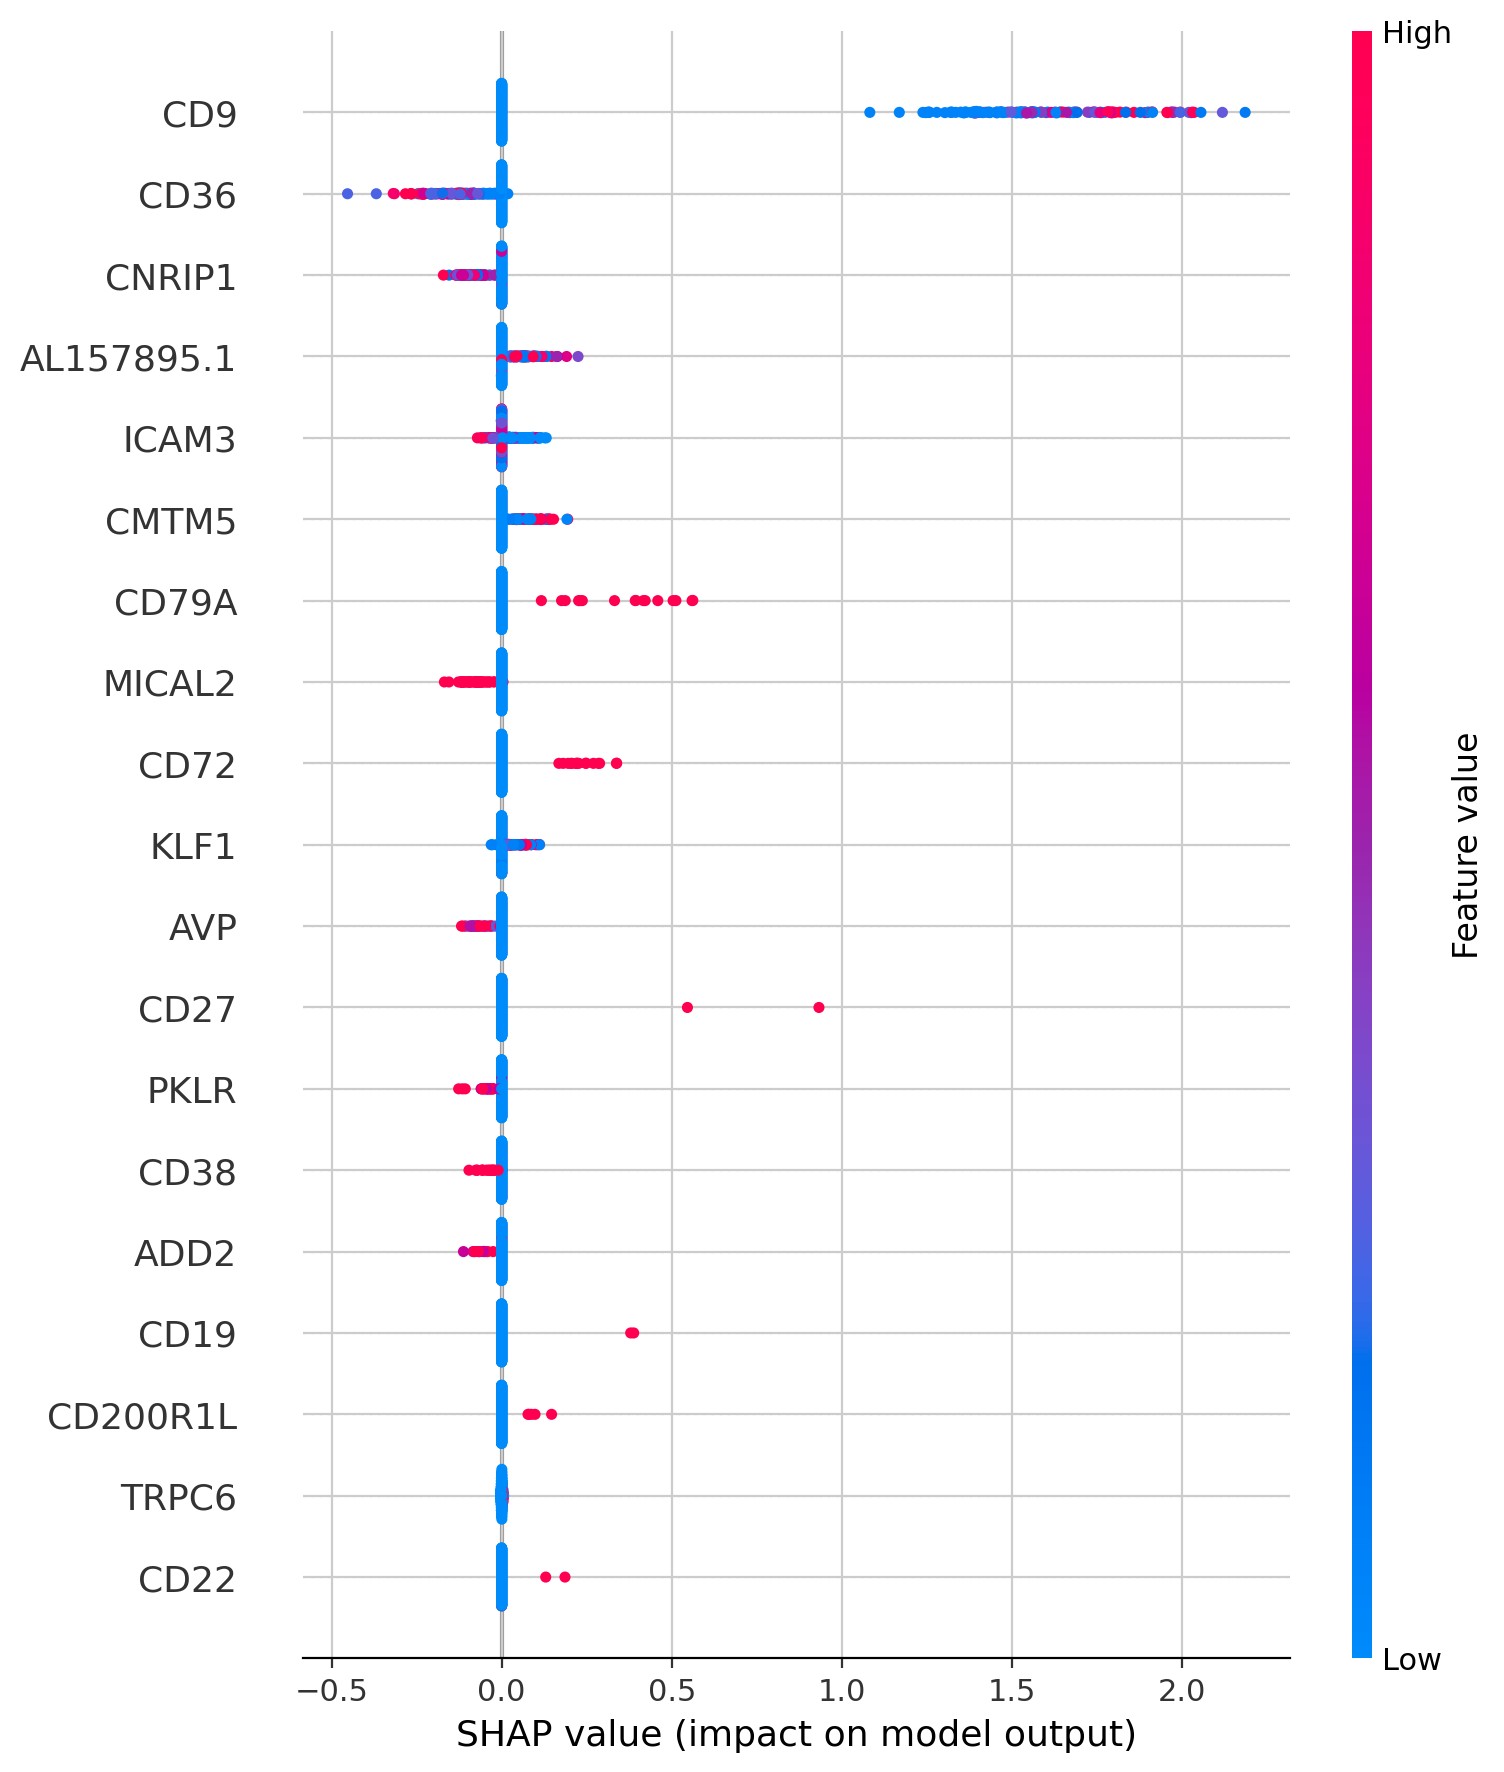

{'ENSG00000010278_CD9': 14.155401514909585,
 'ENSG00000119865_CNRIP1': 11.290338586473972,
 'ENSG00000133816_MICAL2': 9.620281880771563,
 'ENSG00000101200_AVP': 8.795134419792095,
 'ENSG00000137101_CD72': 8.636967836379503,
 'ENSG00000105369_CD79A': 8.569116478076467,
 'ENSG00000206531_CD200R1L': 8.085606635054098,
 'ENSG00000075340_ADD2': 8.05477265770474,
 'ENSG00000177455_CD19': 8.034742669056397,
 'ENSG00000139193_CD27': 8.034742667137053,
 'ENSG00000004468_CD38': 7.971831065433465,
 'ENSG00000143627_PKLR': 7.96433719981464,
 'ENSG00000012124_CD22': 7.962385923670096,
 'ENSG00000137672_TRPC6': 7.9500444278930855,
 'ENSG00000135218_CD36': 6.497266524232324,
 'ENSG00000233968_AL157895.1': 4.6149099120521395,
 'ENSG00000076662_ICAM3': 4.423377927062738,
 'ENSG00000166091_CMTM5': 2.742130819885316,
 'ENSG00000105610_KLF1': 2.650945018159968,
 'ENSG00000107130_NCS1': 2.5450235640990253,
 'ENSG00000137801_THBS1': 1.5682006772729766,
 'ENSG00000134061_CD180': 1.4248476836372117,
 'ENSG000

In [6]:
ranking_corr(16, 'CD9', random_sample_number=1000)


1
2


invalid value encountered in divide


3
4


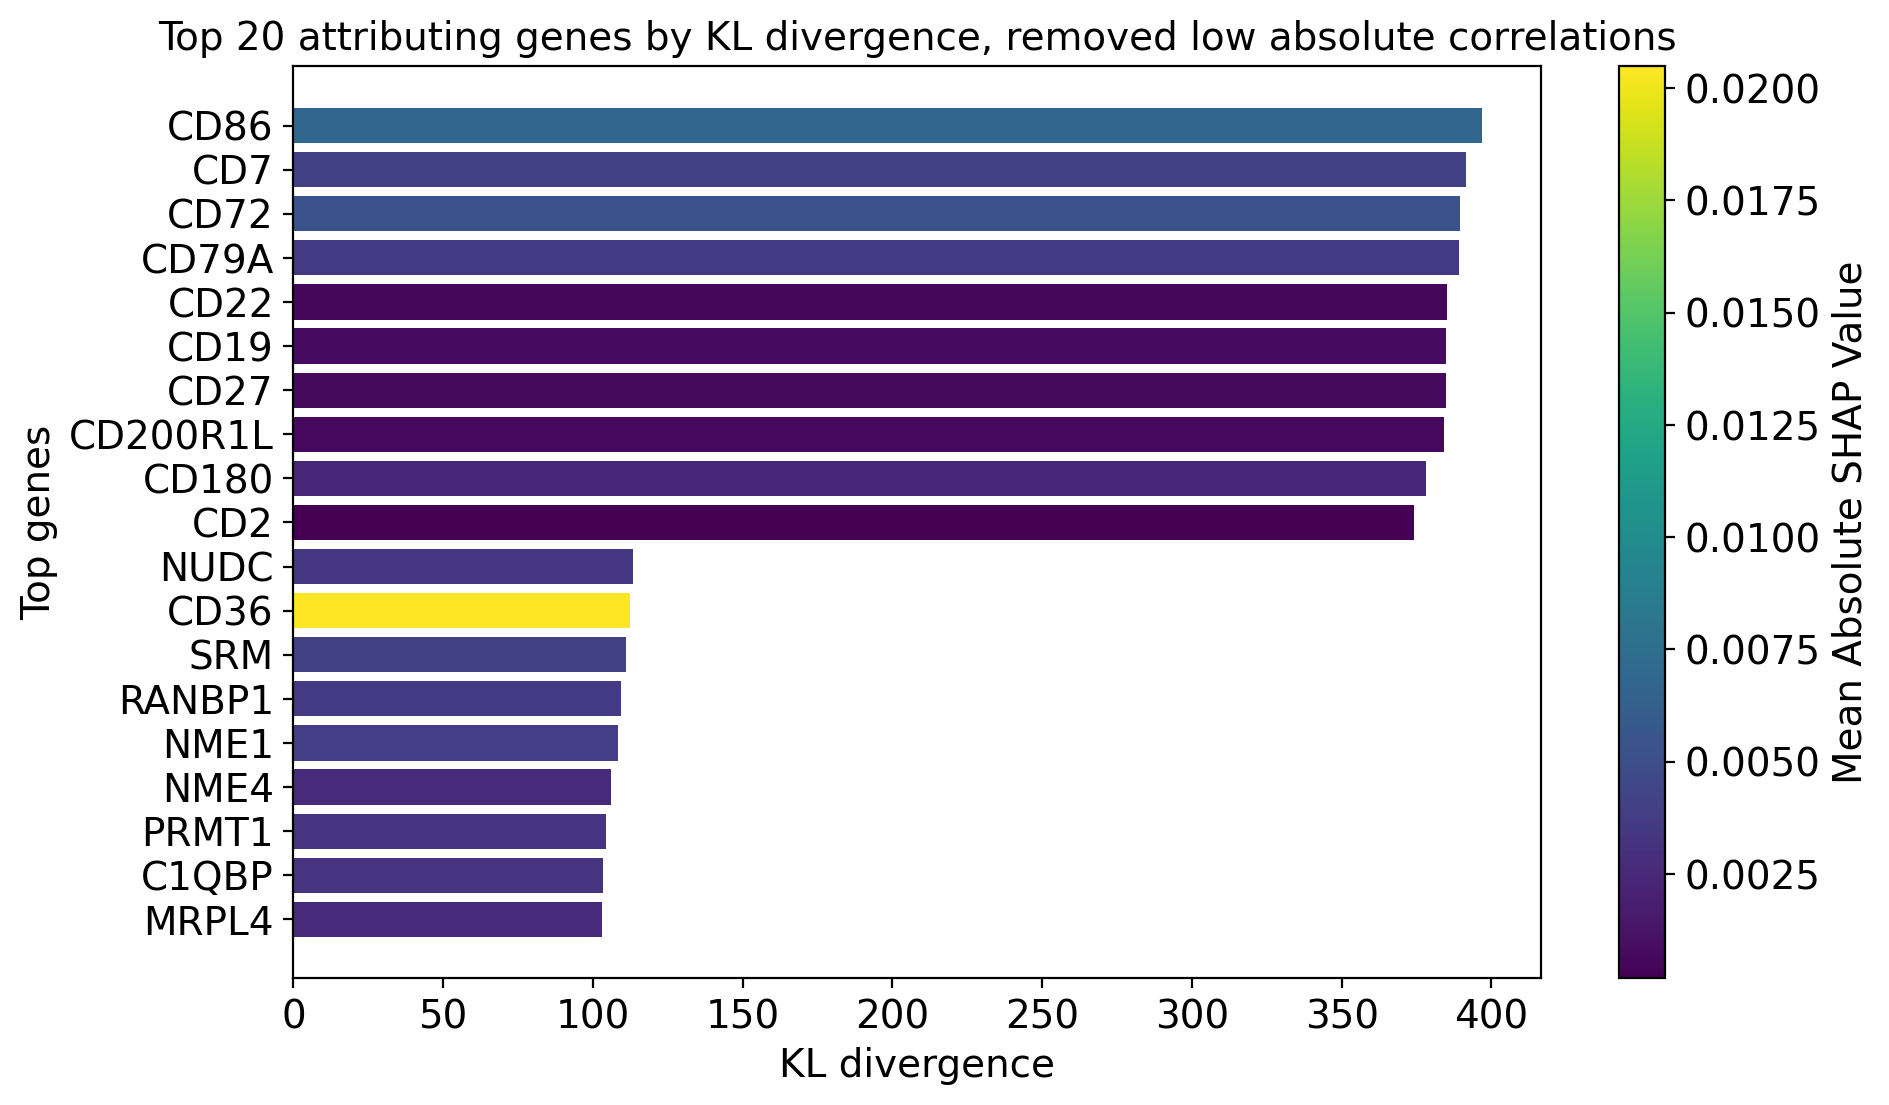

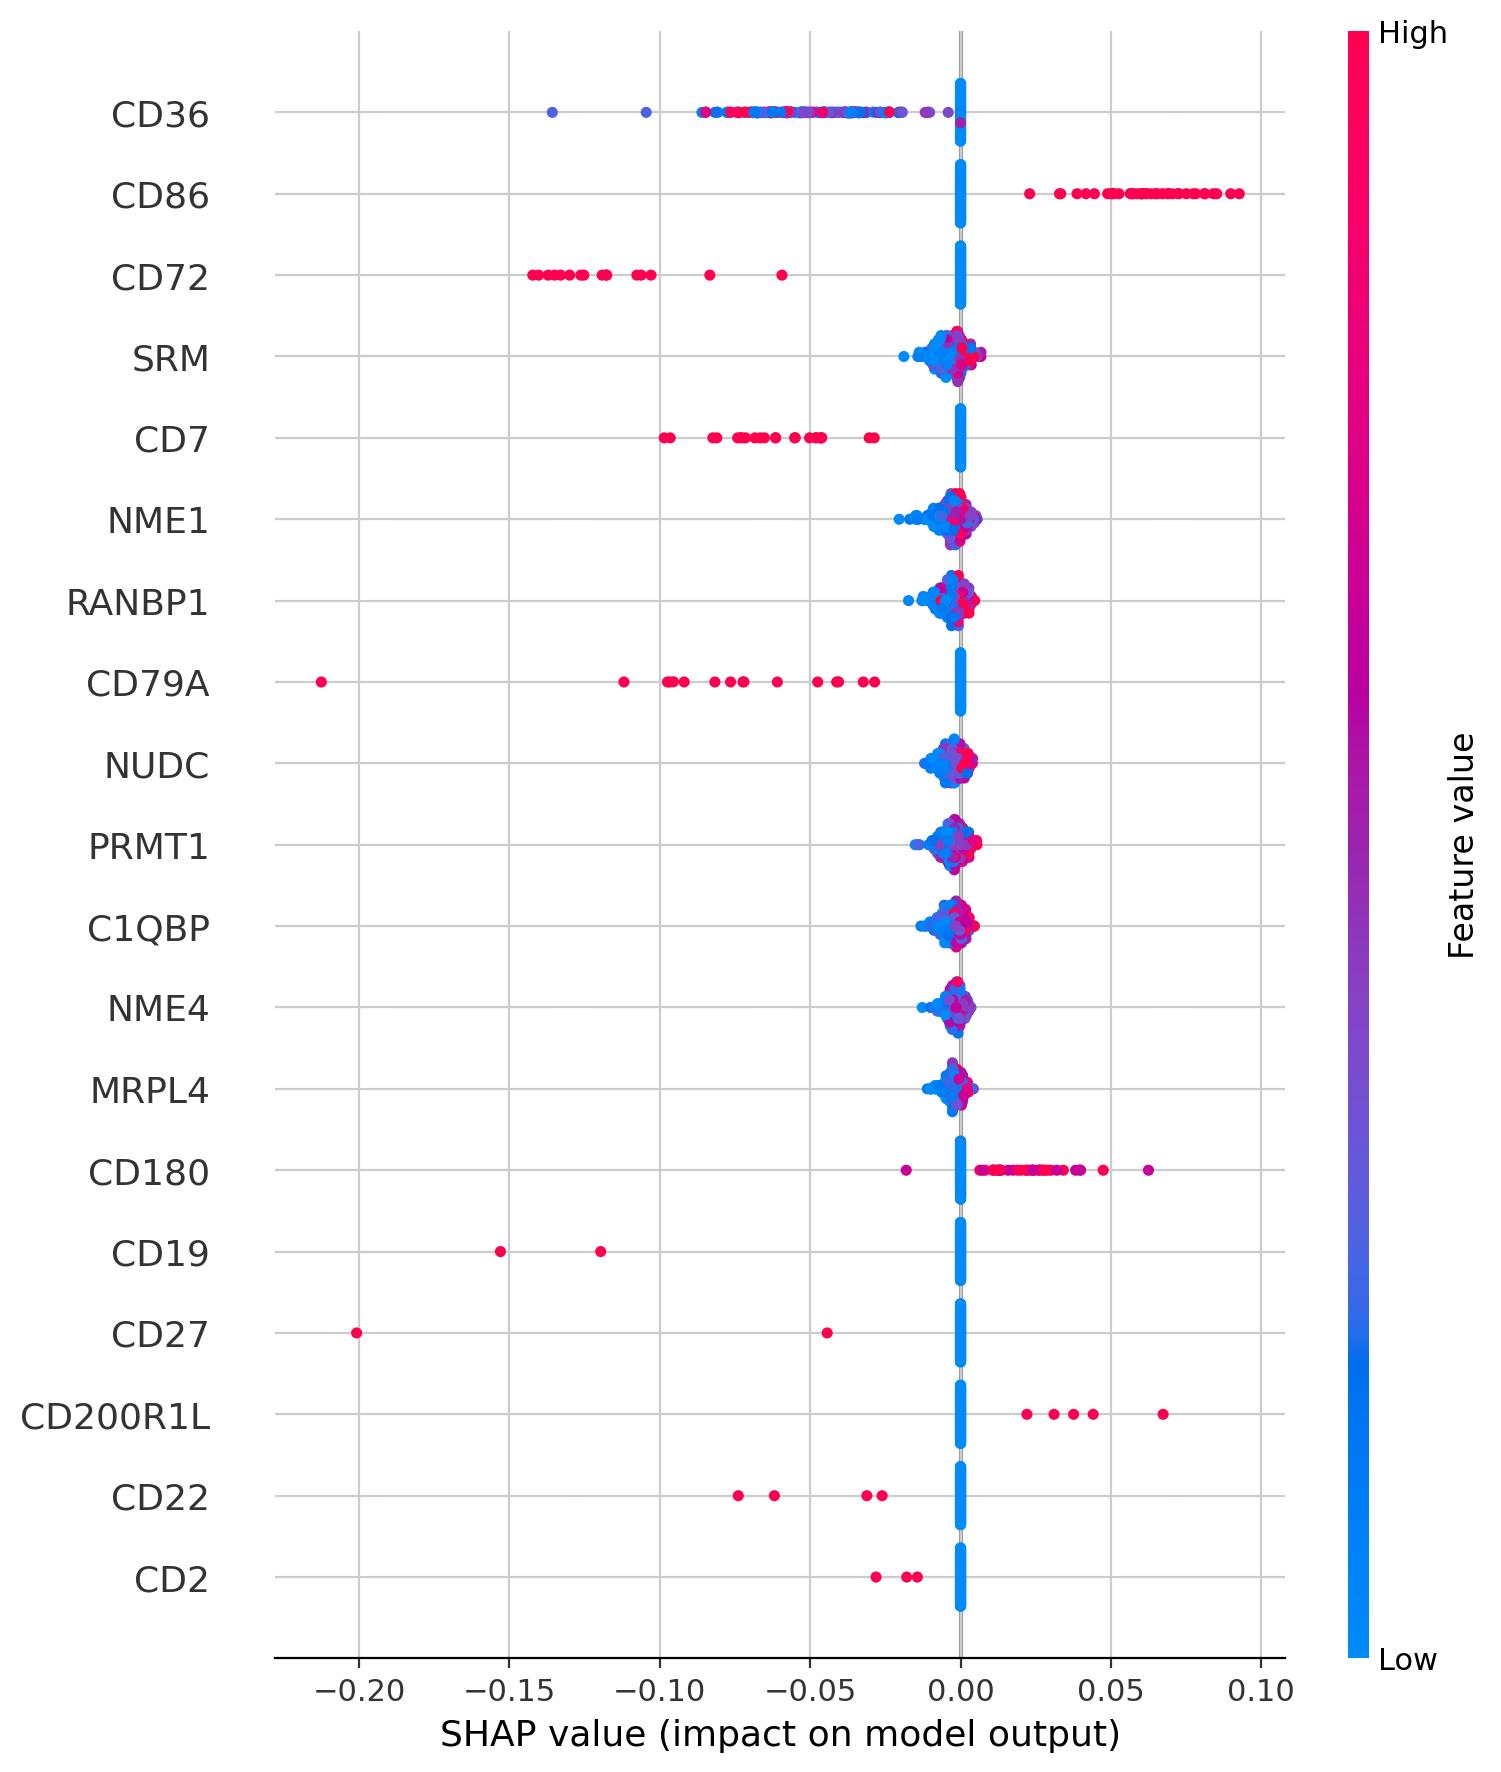

In [135]:
ranked = ranking_corr_new(16, 'CD86', random_sample_number=1000)

1
119.61385622737056


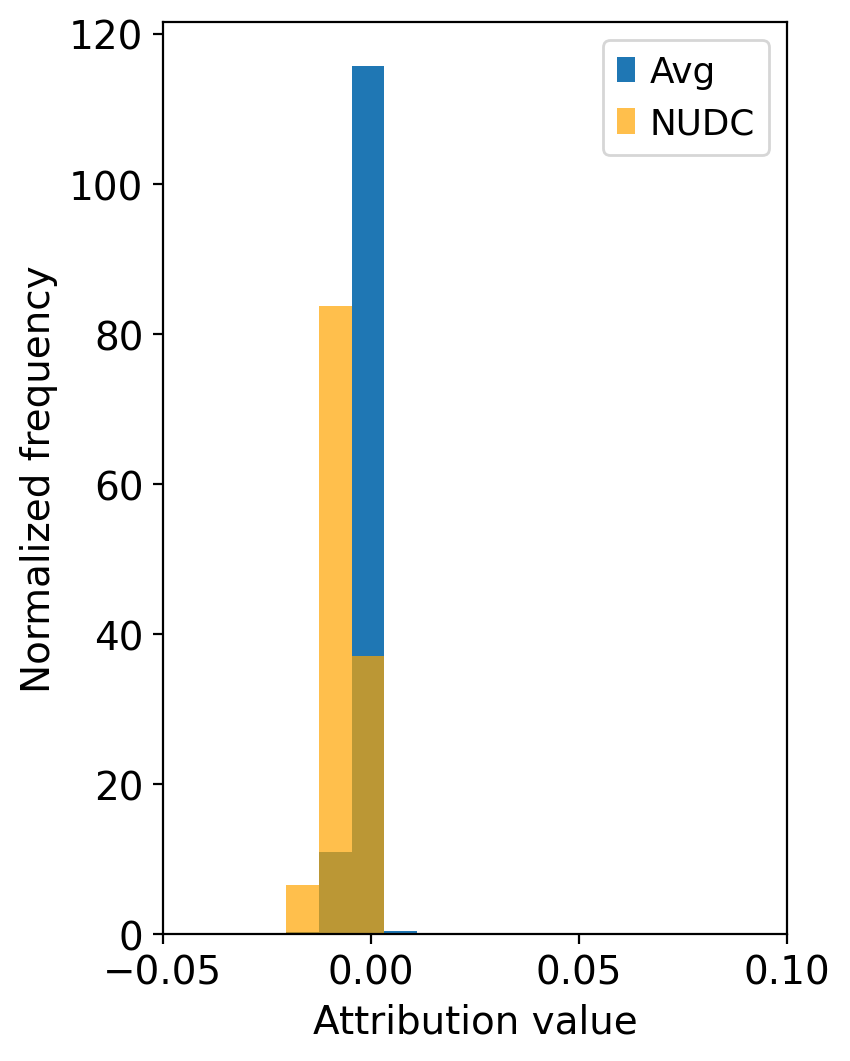

In [52]:
plot_distr_avg_gene_for_slides(16, 'CD86', 'NUDC')   # decreasing kl divergence for decreasingly important genes

1
113.51609227916893


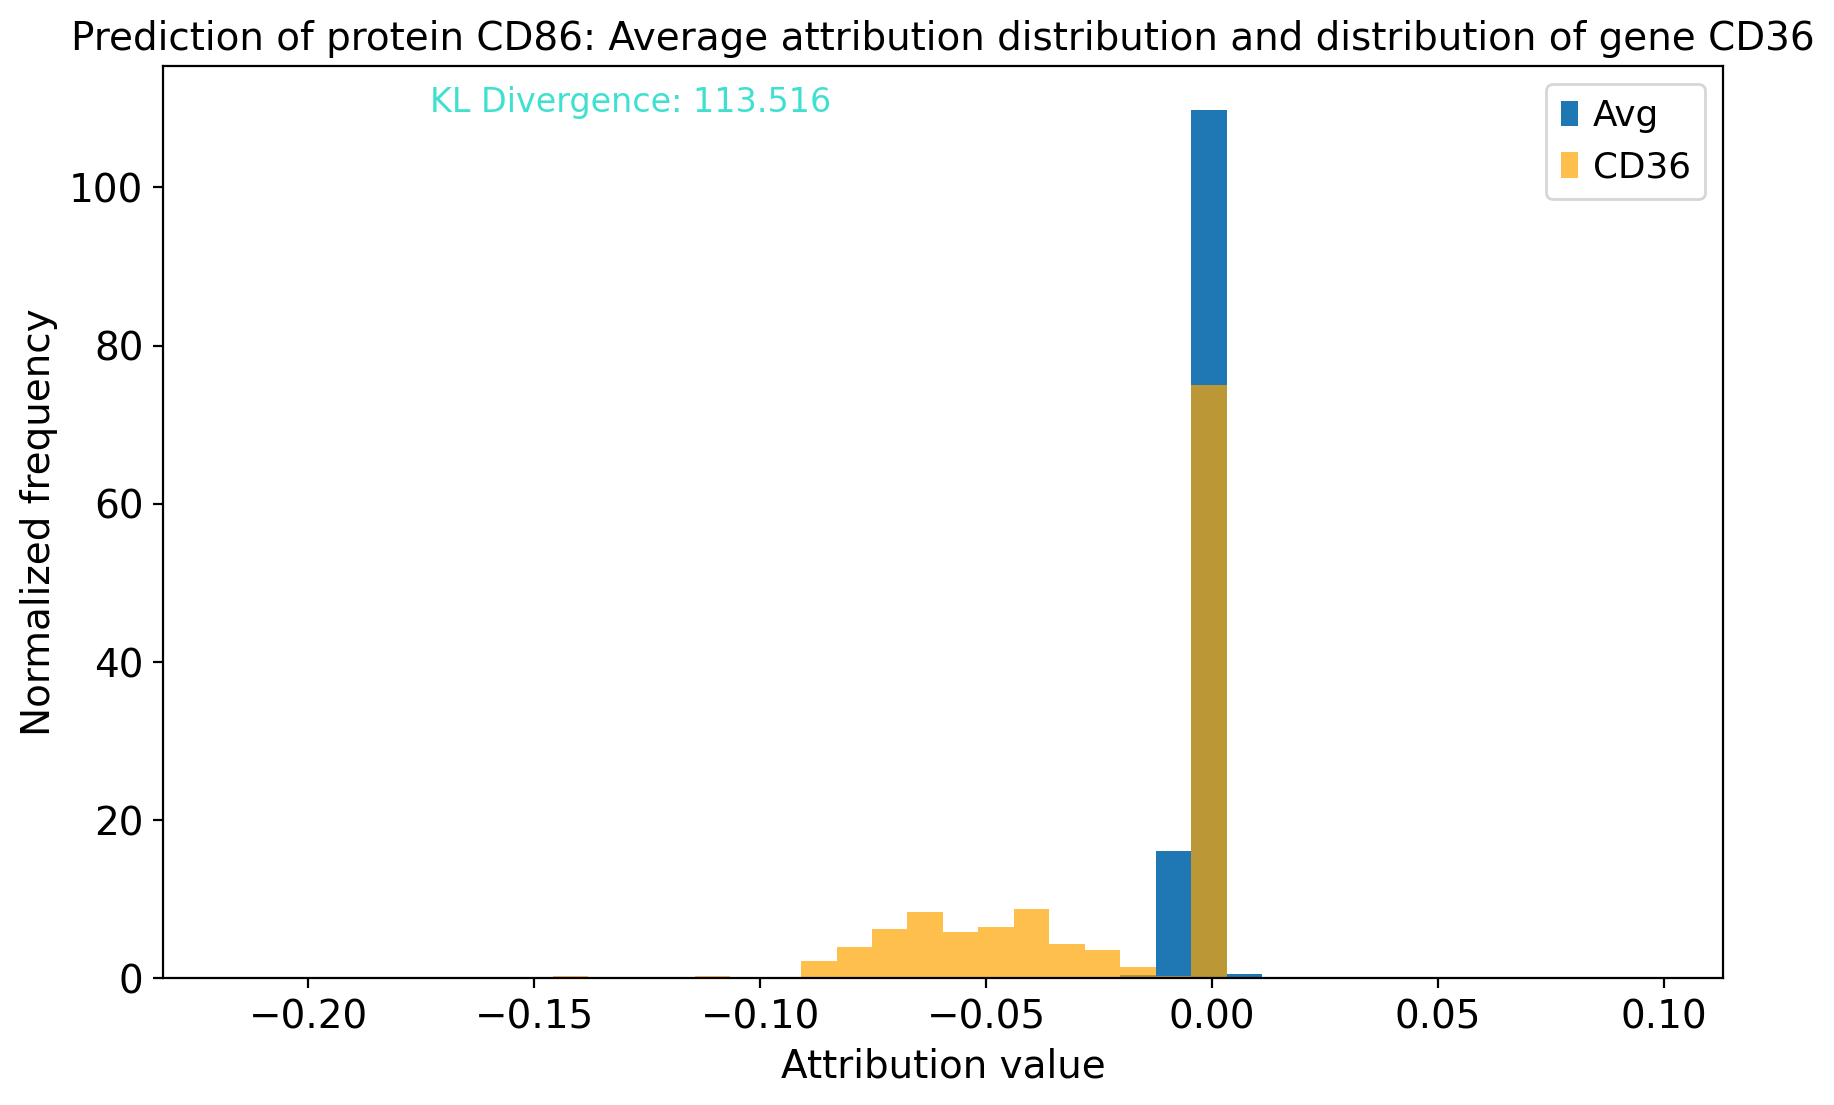

In [14]:
plot_distr_avg_gene(16, 'CD86', 'CD36')   # decreasing kl divergence for decreasingly important genes

In [ ]:
# corr = get_corr_df(attr_all_22085_genes_16[get_protein_idx('CD7')])

In [ ]:
# check CD9: high kl divergence but not among top 20 -> because its corr. is 0.494.......
# other usual examples work well

### filter by mean attribution

In [19]:
def ranking_mean(model_number, protein, random_sample_number):
    ranking_dict = {}
    if model_number == 16:
        attr = attr_all_22085_genes_16[get_protein_idx(protein)]
    elif model_number == 17:
        attr = attr_all_22085_genes_17[get_protein_idx(protein)]
        
    shap_sum = np.abs(attr).sum(axis=0)  # (mean attribution)
    
    range_attr=(attr.min().min(), attr.max().max())
    
    # average distr.:
    # sample 20 random features to compare to
    df = attr.copy()
    random_columns = random.sample(df.columns.tolist(), random_sample_number)
    df = df[random_columns]

    # Initialize an array to store the sum of histograms
    hist_sum = np.zeros(40)  # 40 bins
    # Calculate the histogram for each column and sum them
    for col in df.columns:
        hist, _ = np.histogram(df[col], bins=40, range=range_attr, density=True)
        hist_sum += hist

    # Divide by the number of columns to average hist_sum
    avg_hist = hist_sum /len(df.columns)
    
    for gene in train_column:
        # histogram for single gene to be compared
        hist, _ = np.histogram(attr[gene], bins=40, range=range_attr, density=True)
        
        # append this gene's kl divergence to ranking_dict: IF mean attribution > threshold (0.1)
        
        if shap_sum.loc[gene] > 0.2:
            
            ranking_dict[gene] = np.sum(scipy.special.kl_div(avg_hist+1e-10, hist+1e-10))  # hist+1e-10, avg_hist+1e-10
        # print(gene, ranking_dict[gene])
    
    sorted_dict = dict(sorted(ranking_dict.items(), key=lambda item: item[1], reverse=True))
    
    # only keep genes with abs. corr. >= 0.45 -> remove all 0 attributions
    
    # ranked_filtered_corr = {}
    # shap_sum = np.abs(attr).sum(axis=0)
    # for gene in sorted_dict:
    #     if shap_sum.loc[gene] > 0.1:   # TODO try other thresholds
    #         ranked_filtered_corr[gene] = sorted_dict[gene]
    
    # ranked_filtered_corr = dict(sorted(ranked_filtered_corr.items(), key=lambda item: item[1], reverse=True))
    top_20_entries = dict(list(sorted_dict.items())[:19])
    
    # force ground truth gene if exists and not yet in top_20_entries
    try:
        if get_gene_name(protein)[0] not in list(top_20_entries.keys()):
            print(f'manually added gene {protein}')
            top_20_entries[get_gene_name(protein)[0]] = ranking_dict[get_gene_name(protein)[0]]
    except Exception as e:
        print(e)
        print('no')
    
    # plot ranking
    plt.figure(figsize=(10, 6))
    plt.barh(list(top_20_entries.keys())[::-1], list(top_20_entries.values())[::-1])
    plt.ylabel('Top genes')
    plt.xlabel('KL divergence')
    plt.title('Top 20 attributing genes by KL divergence, removed low absolute correlations')
    plt.grid(False)
    plt.show()
    
    # plot corresponding beeswarm
    shap.initjs()
    shap.summary_plot(np.array(attr[list(top_20_entries.keys())]), 
                      xtest_all_genes[list(top_20_entries.keys())], 
                      feature_names=list(top_20_entries.keys()))

1
2


invalid value encountered in divide


3
4


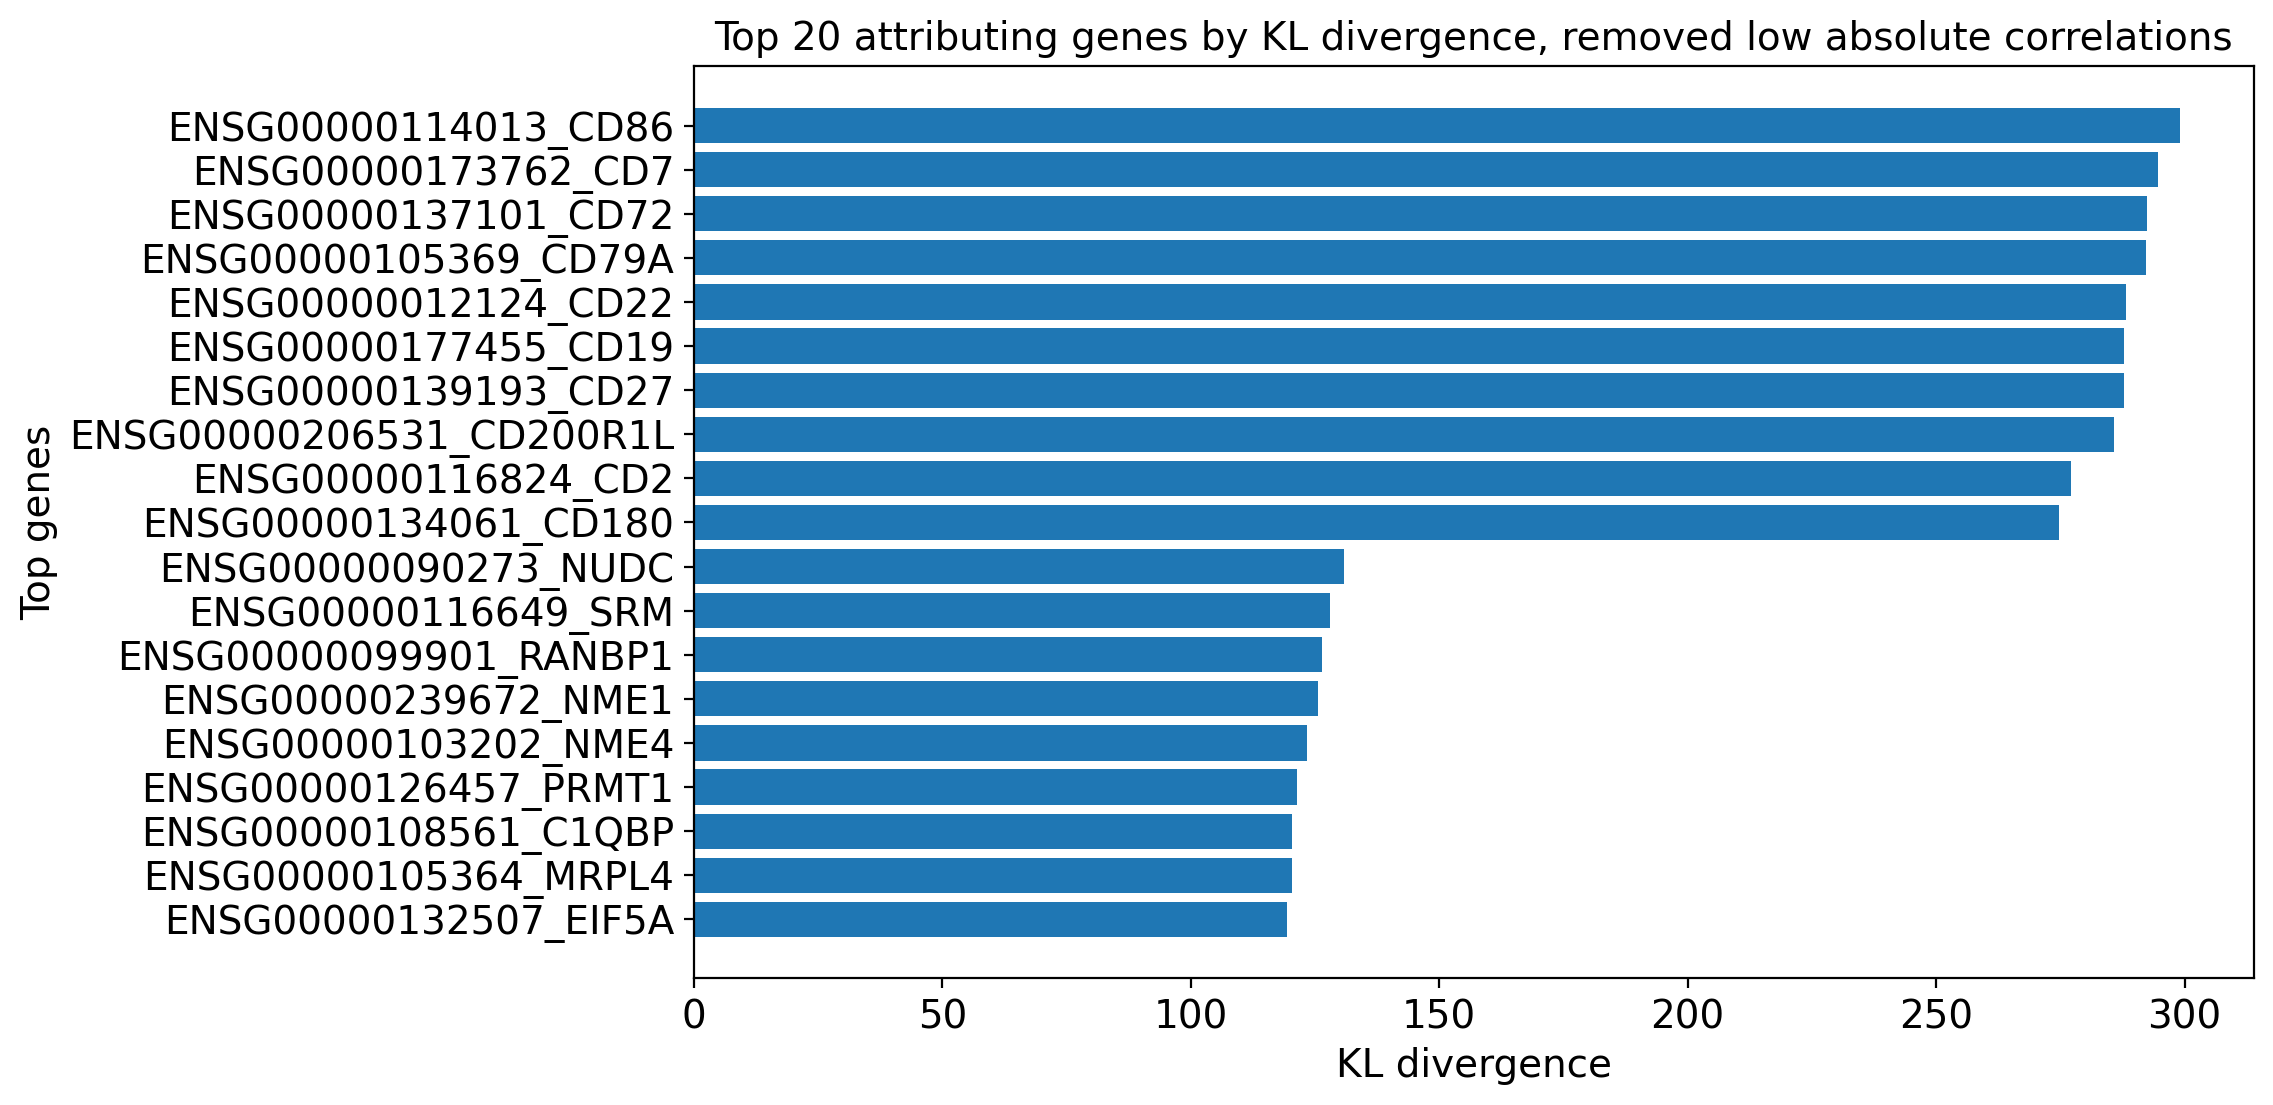

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


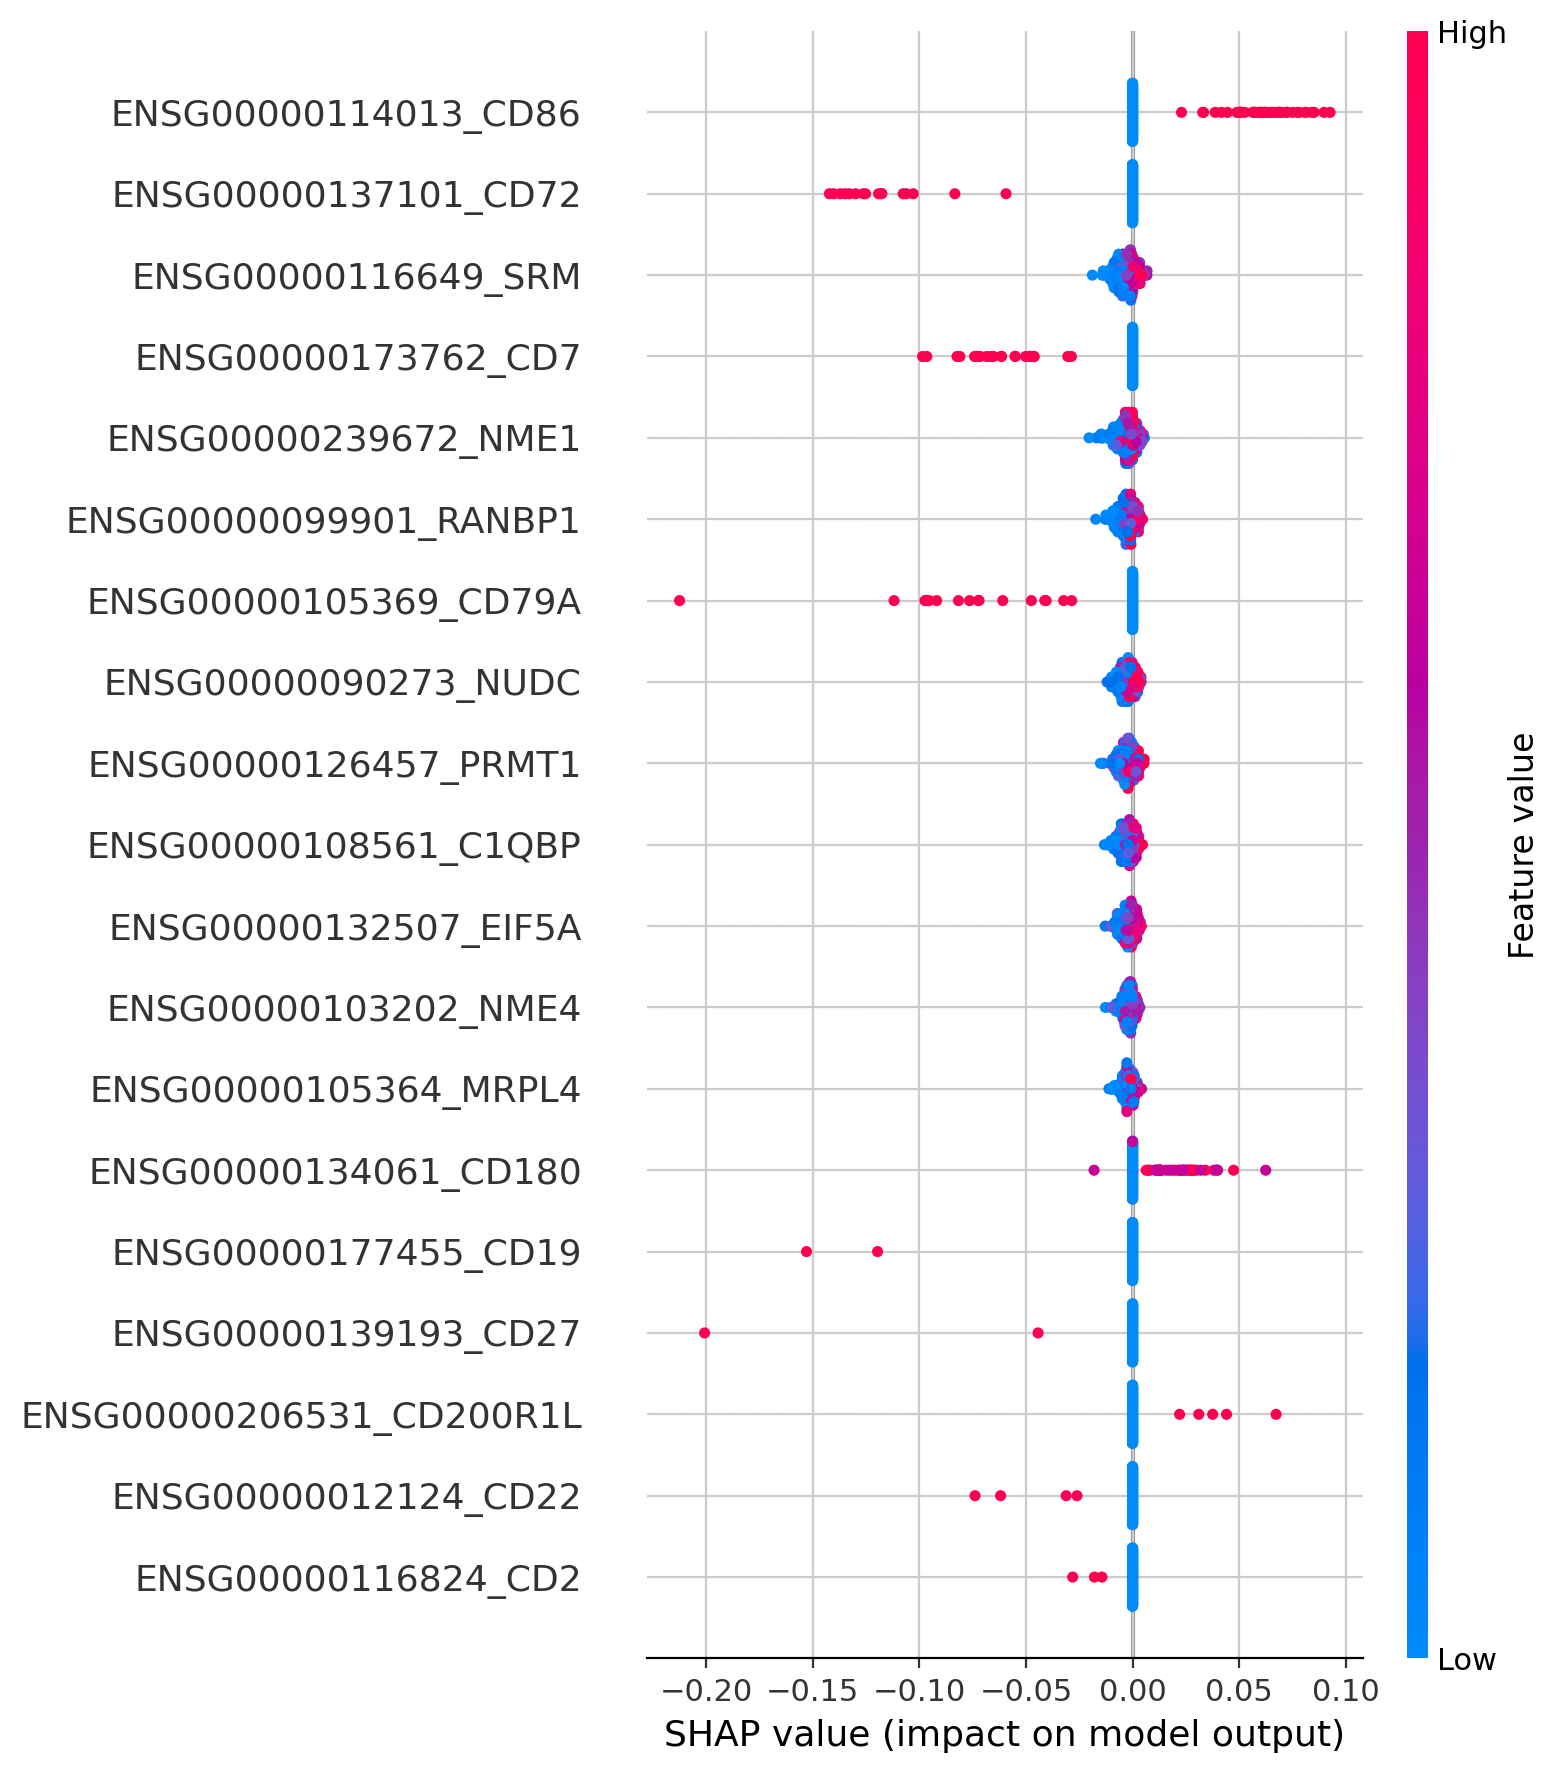

NameError: name 'ranked_filtered_corr' is not defined

In [16]:
ranking_corr(16, 'CD86', random_sample_number=100)

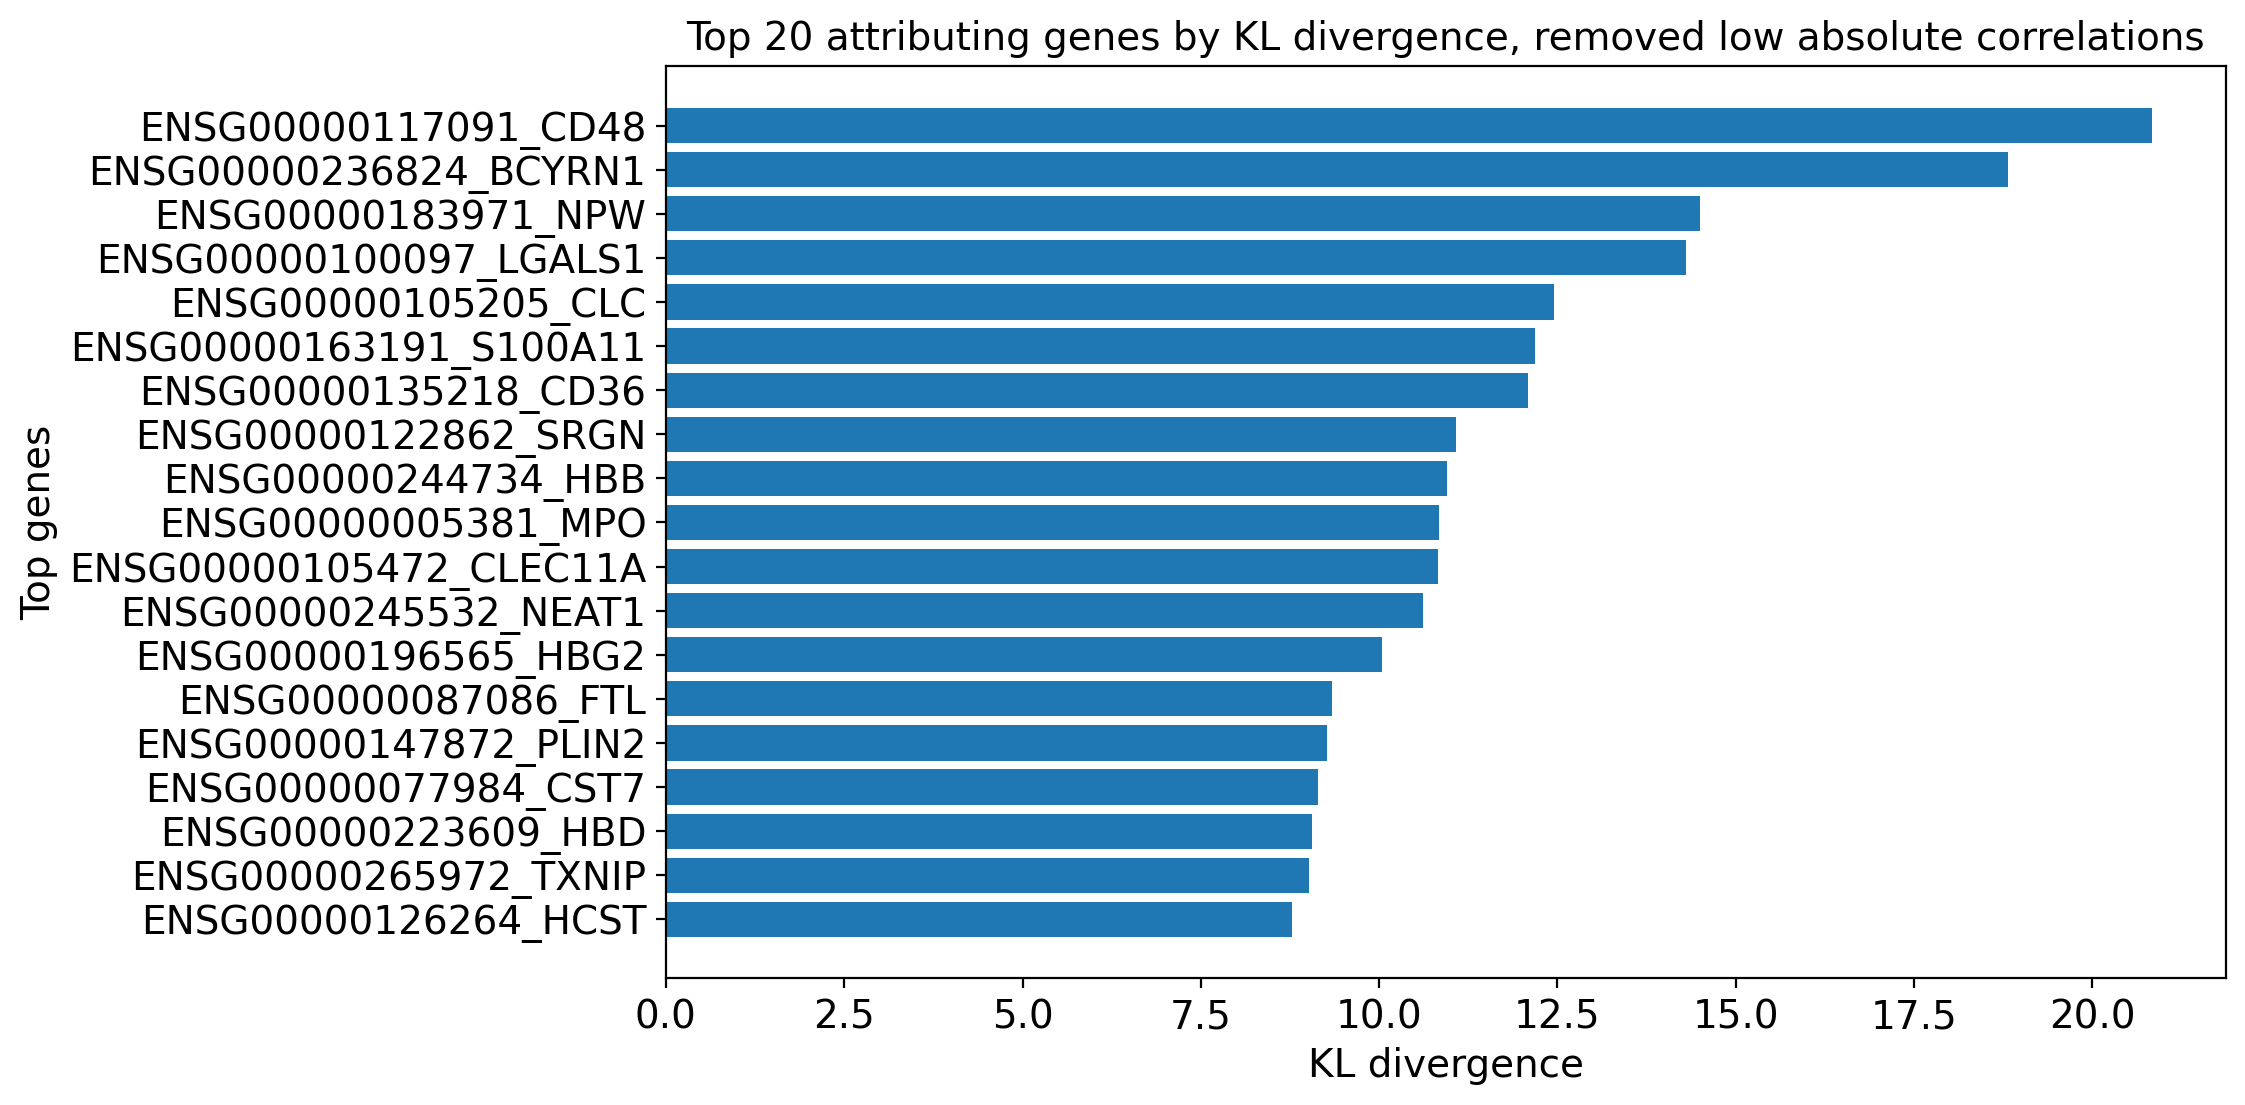

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


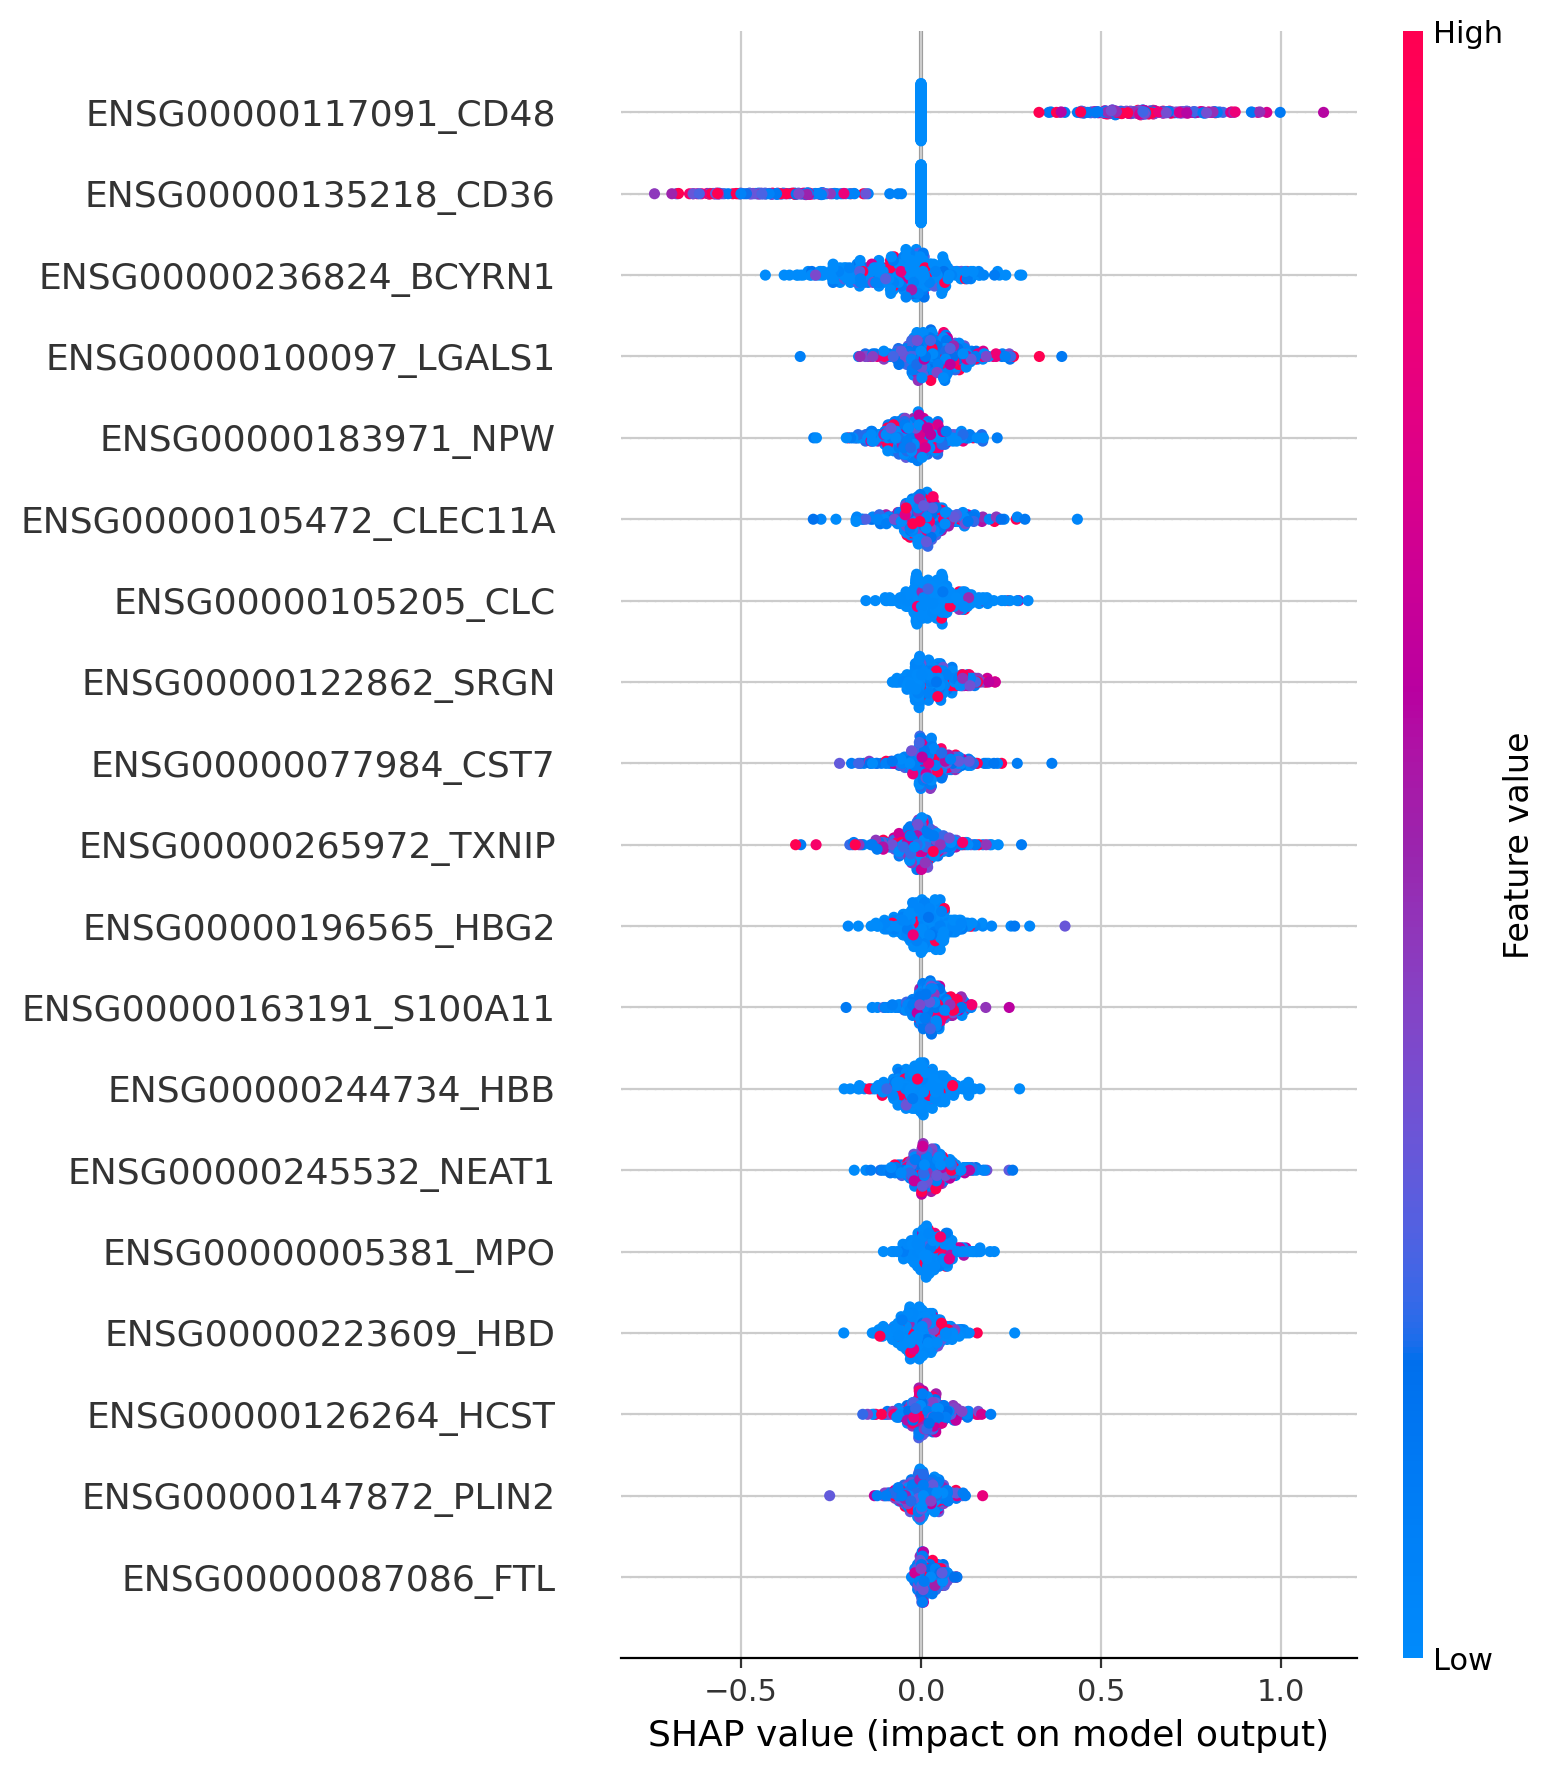

In [22]:
ranking_mean(16, 'CD48', random_sample_number=100)